In [2]:
import numpy as np
import pandas as pd

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

# 1 对象创建

In [10]:
'''通过传入一些值的列表来创建一个Series，Pandas会自动创建一个默认的整数索引'''
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)
type(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


pandas.core.series.Series

In [6]:
'''通过传递带有日期时间索引和带标签列的NumPy数组来创建DataFrame'''
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.182445,0.975909,-0.439497,-0.763370
2013-01-02,-1.186539,0.431764,-0.583986,-0.982010
2013-01-03,-0.065951,-0.326945,-0.471906,-1.027580
2013-01-04,1.054726,-0.381668,-0.910579,-0.008844
2013-01-05,-0.528619,0.224621,-1.518255,-1.327622
2013-01-06,-0.023083,0.920922,-1.358342,0.287514


In [8]:
'''通过传递可以转化为类似Series的dict对象来创建`DataFrame`'''
df2 = pd.DataFrame({'A': 1., 'B': pd.Timestamp('20130102'), 'C': pd.Series(1, index=list(range(4)), dtype='float32'),'D': np.array([3] * 4, dtype='int32'),'E': pd.Categorical(["test", "train", "test", "train"]), 'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
'''DataFrame的列具有不同的[数据类型]'''
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 2 查看数据

In [11]:
df.head()

,A,B,C,D
2013-01-01,0.182445,0.975909,-0.439497,-0.763370
2013-01-02,-1.186539,0.431764,-0.583986,-0.982010
2013-01-03,-0.065951,-0.326945,-0.471906,-1.027580
2013-01-04,1.054726,-0.381668,-0.910579,-0.008844
2013-01-05,-0.528619,0.224621,-1.518255,-1.327622


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,1.054726,-0.381668,-0.910579,-0.008844
2013-01-05,-0.528619,0.224621,-1.518255,-1.327622
2013-01-06,-0.023083,0.920922,-1.358342,0.287514


In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
 df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
'''DataFrame.to_numpy() 会给出一个比较底层的NumPy对象。注意，当你的 DataFrame 有多个列并且每列的数据类型不同时，这个操作是不可行的，这也可以说是Pandas和NumPy之间的根本区别：**NumPy的每一个array对象只有一种数据类型，但是Pandas的每一列的数据类型都是相同的（译者注：Pandas不需要像Numpy那样所有元素的类型都相同）**. 当你调用 [DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy)时, Pandas会寻找可以涵盖DataFrame中所有元素类型的NumPy数据类型。
这可能最终成为对象，需要将每个值强制转换为Python对象
对于 `df`, 对于所有值是浮点数的DataFrame DataFrame.to_numpy()操作是高效的，并且不会复制数据
'''
df.to_numpy()

array([[ 0.1824446 ,  0.97590905, -0.43949688, -0.76336951],
       [-1.18653892,  0.43176378, -0.58398576, -0.98201025],
       [-0.06595096, -0.32694498, -0.47190567, -1.02758036],
       [ 1.05472622, -0.3816679 , -0.91057896, -0.00884399],
       [-0.52861857,  0.2246205 , -1.51825459, -1.32762187],
       [-0.02308264,  0.92092216, -1.35834195,  0.2875145 ]])

In [16]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [17]:
'''describe() 方法显示数据的快速统计摘要'''
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.094503,0.307434,-0.880427,-0.636985
std,0.746236,0.586999,0.465902,0.634637
min,-1.186539,-0.381668,-1.518255,-1.327622
25%,-0.412952,-0.189054,-1.246401,-1.016188
50%,-0.044517,0.328192,-0.747282,-0.872690
75%,0.131063,0.798633,-0.499926,-0.197475
max,1.054726,0.975909,-0.439497,0.287514


In [18]:
'''转置数据'''
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.182445,-1.186539,-0.065951,1.054726,-0.528619,-0.023083
B,0.975909,0.431764,-0.326945,-0.381668,0.224621,0.920922
C,-0.439497,-0.583986,-0.471906,-0.910579,-1.518255,-1.358342
D,-0.763370,-0.982010,-1.027580,-0.008844,-1.327622,0.287514


In [19]:
'''按轴排序'''
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.763370,-0.439497,0.975909,0.182445
2013-01-02,-0.982010,-0.583986,0.431764,-1.186539
2013-01-03,-1.027580,-0.471906,-0.326945,-0.065951
2013-01-04,-0.008844,-0.910579,-0.381668,1.054726
2013-01-05,-1.327622,-1.518255,0.224621,-0.528619
2013-01-06,0.287514,-1.358342,0.920922,-0.023083


In [20]:
'''按值排序'''
df.sort_values(by='B')

,A,B,C,D
2013-01-04,1.054726,-0.381668,-0.910579,-0.008844
2013-01-03,-0.065951,-0.326945,-0.471906,-1.027580
2013-01-05,-0.528619,0.224621,-1.518255,-1.327622
2013-01-02,-1.186539,0.431764,-0.583986,-0.982010
2013-01-06,-0.023083,0.920922,-1.358342,0.287514
2013-01-01,0.182445,0.975909,-0.439497,-0.763370


# 3 选择

In [21]:
'''虽然用于选择和赋值的标准Python / Numpy表达式非常直观，并且便于交互工作，但是对于生产环境的代码，
我们推荐优化的Pandas数据访问方法.at、.iat、.loc和.iloc
选择一个列，产生一个“Series”，相当于“df.A”
'''
df['A']

2013-01-01    0.182445
2013-01-02   -1.186539
2013-01-03   -0.065951
2013-01-04    1.054726
2013-01-05   -0.528619
2013-01-06   -0.023083
Freq: D, Name: A, dtype: float64

## 3.1 按标签选择

In [22]:
'''通过[ ]选择，对行进行切片'''
df[0:3]

,A,B,C,D
2013-01-01,0.182445,0.975909,-0.439497,-0.76337
2013-01-02,-1.186539,0.431764,-0.583986,-0.98201
2013-01-03,-0.065951,-0.326945,-0.471906,-1.02758


In [23]:
'''通过标签获取一行数据'''
df.loc[dates[0]]

A    0.182445
B    0.975909
C   -0.439497
D   -0.763370
Name: 2013-01-01 00:00:00, dtype: float64

In [24]:
'''通过标签在多个轴上选择数据'''
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.182445,0.975909
2013-01-02,-1.186539,0.431764
2013-01-03,-0.065951,-0.326945
2013-01-04,1.054726,-0.381668
2013-01-05,-0.528619,0.224621
2013-01-06,-0.023083,0.920922


In [25]:
'''通过标签同时在两个轴上切片'''
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.186539,0.431764
2013-01-03,-0.065951,-0.326945
2013-01-04,1.054726,-0.381668


In [26]:
'''减小返回对象的大小'''
df.loc['20130102', ['A', 'B']]

A   -1.186539
B    0.431764
Name: 2013-01-02 00:00:00, dtype: float64

In [27]:
'''获取标量值'''
df.loc[dates[0], 'A']

0.18244460453213848

In [29]:
df.at[dates[0], 'A'] #同上

0.18244460453213848

## 3.2 按位置选择

In [30]:
'''通过传递的整数的位置选择'''
df.iloc[3]

A    1.054726
B   -0.381668
C   -0.910579
D   -0.008844
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
'''通过整数切片，类似于numpy/Python'''
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.054726,-0.381668
2013-01-05,-0.528619,0.224621


In [32]:
'''通过传递整数的列表按位置切片，类似于numpy/Python'''
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.186539,-0.583986
2013-01-03,-0.065951,-0.471906
2013-01-05,-0.528619,-1.518255


In [33]:
'''整行切片'''
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.186539,0.431764,-0.583986,-0.98201
2013-01-03,-0.065951,-0.326945,-0.471906,-1.02758


In [34]:
'''整列切片'''
df.iloc[:, 1:3]

,B,C
2013-01-01,0.975909,-0.439497
2013-01-02,0.431764,-0.583986
2013-01-03,-0.326945,-0.471906
2013-01-04,-0.381668,-0.910579
2013-01-05,0.224621,-1.518255
2013-01-06,0.920922,-1.358342


In [35]:
'''获取具体值'''
df.iloc[1, 1]

0.4317637797786694

In [36]:
df.iat[1, 1] #同上

0.4317637797786694

# 3.3 布尔索引

In [37]:
'''使用单个列的值来选择数据'''
df[df.A > 0]

,A,B,C,D
2013-01-01,0.182445,0.975909,-0.439497,-0.763370
2013-01-04,1.054726,-0.381668,-0.910579,-0.008844


In [38]:
'''从满足布尔条件的DataFrame中选择值'''
df[df > 0]

,A,B,C,D
2013-01-01,0.182445,0.975909,NaN,NaN
2013-01-02,NaN,0.431764,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,1.054726,NaN,NaN,NaN
2013-01-05,NaN,0.224621,NaN,NaN
2013-01-06,NaN,0.920922,NaN,0.287514


In [39]:
'''使用 isin() 方法过滤'''
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.182445,0.975909,-0.439497,-0.763370,one
2013-01-02,-1.186539,0.431764,-0.583986,-0.982010,one
2013-01-03,-0.065951,-0.326945,-0.471906,-1.027580,two
2013-01-04,1.054726,-0.381668,-0.910579,-0.008844,three
2013-01-05,-0.528619,0.224621,-1.518255,-1.327622,four
2013-01-06,-0.023083,0.920922,-1.358342,0.287514,three


In [40]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.065951,-0.326945,-0.471906,-1.027580,two
2013-01-05,-0.528619,0.224621,-1.518255,-1.327622,four


# 3.4 赋值

In [42]:
'''添加新列将自动根据索引对齐数据'''
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [43]:
'''通过标签赋值'''
df.at[dates[0], 'A'] = 0

In [44]:
'''通过位置赋值'''
df.iat[0, 1] = 0

In [46]:
'''使用NumPy数组赋值'''
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.439497,5
2013-01-02,-1.186539,0.431764,-0.583986,5
2013-01-03,-0.065951,-0.326945,-0.471906,5
2013-01-04,1.054726,-0.381668,-0.910579,5
2013-01-05,-0.528619,0.224621,-1.518255,5
2013-01-06,-0.023083,0.920922,-1.358342,5


In [47]:
'''带有where条件的赋值操作'''
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.439497,-5
2013-01-02,-1.186539,-0.431764,-0.583986,-5
2013-01-03,-0.065951,-0.326945,-0.471906,-5
2013-01-04,-1.054726,-0.381668,-0.910579,-5
2013-01-05,-0.528619,-0.224621,-1.518255,-5
2013-01-06,-0.023083,-0.920922,-1.358342,-5


# 4 缺失值 

In [48]:
'''Pandas主要使用值np.nan来表示缺失的数据。 默认情况下，它不包含在计算中
重建索引允许你更改/添加/删除指定轴上的索引。 这个操作会返回一个副本(不会更改原来的对象)。
'''
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.439497,5,1.0
2013-01-02,-1.186539,0.431764,-0.583986,5,1.0
2013-01-03,-0.065951,-0.326945,-0.471906,5,NaN
2013-01-04,1.054726,-0.381668,-0.910579,5,NaN


In [49]:
 '''删除任何带有缺失值的行'''
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.439497,5,1.0
2013-01-02,-1.186539,0.431764,-0.583986,5,1.0


In [50]:
'''填充缺失值'''
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.439497,5,1.0
2013-01-02,-1.186539,0.431764,-0.583986,5,1.0
2013-01-03,-0.065951,-0.326945,-0.471906,5,5.0
2013-01-04,1.054726,-0.381668,-0.910579,5,5.0


In [51]:
'''获取值为nan的掩码'''
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


# 5 操作

## 5.1 统计

In [52]:
'''在一些操作中经常会排除缺失值
进行描述性统计
'''
df.mean()

A   -0.124911
B    0.144782
C   -0.880427
D    5.000000
dtype: float64

In [53]:
'''在其它轴(行)上进行同样的操作'''
df.mean(1)

2013-01-01    1.140126
2013-01-02    0.915310
2013-01-03    1.033800
2013-01-04    1.190620
2013-01-05    0.794437
2013-01-06    1.134874
Freq: D, dtype: float64

In [54]:
'''使用具有不同维度且需要对齐的对象进行操作。 此外，Pandas会自动沿指定维度进行广播'''
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [55]:
 df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.065951,-1.326945,-1.471906,4.0
2013-01-04,-1.945274,-3.381668,-3.910579,2.0
2013-01-05,-5.528619,-4.775379,-6.518255,0.0
2013-01-06,NaN,NaN,NaN,NaN


## 5.2 应用(Apply)

In [56]:
'''将函数应用于数据'''
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.439497,5
2013-01-02,-1.186539,0.431764,-1.023483,10
2013-01-03,-1.252490,0.104819,-1.495388,15
2013-01-04,-0.197764,-0.276849,-2.405967,20
2013-01-05,-0.726382,-0.052229,-3.924222,25
2013-01-06,-0.749465,0.868694,-5.282564,30


In [57]:
df.apply(lambda x: x.max() - x.min())

A    2.241265
B    1.302590
C    1.078758
D    0.000000
dtype: float64

## 5.3 直方图化

In [60]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    3
2    2
3    4
4    3
5    5
6    2
7    5
8    6
9    6
dtype: int32

In [61]:
 s.value_counts()

2    3
6    2
5    2
3    2
4    1
dtype: int64

## 5.3 字符串方法

In [63]:
'''Series在str属性中配备了一组字符串处理方法，可以轻松地对数组的每个元素进行操作，如下面的代码片段所示。
请注意，str中的模式匹配中默认情况下通常使用正则表达式'''
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 6 合并(Merge)

## 6.1 连接(Concat)

In [66]:
'''使用 concat()连接Pandas对象'''
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.551820,-0.010123,-0.874246,0.974492
1,-0.123865,-0.217104,-0.303251,-1.470155
2,-0.010202,0.164737,-2.090725,-0.374187
3,1.109095,-0.359748,-0.029806,0.118800
4,0.934435,-0.045715,0.051383,-1.220262
5,-1.004242,-1.429165,-0.985955,-1.345050
6,-0.735647,-0.810489,-1.526798,-1.943452
7,0.736207,-1.604305,-0.067112,-0.905096
8,0.902365,-0.991963,-1.103589,1.135550
9,-0.901947,-0.617634,1.405595,0.721115


In [68]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.551820 -0.010123 -0.874246  0.974492
 1 -0.123865 -0.217104 -0.303251 -1.470155
 2 -0.010202  0.164737 -2.090725 -0.374187,
           0         1         2         3
 3  1.109095 -0.359748 -0.029806  0.118800
 4  0.934435 -0.045715  0.051383 -1.220262
 5 -1.004242 -1.429165 -0.985955 -1.345050
 6 -0.735647 -0.810489 -1.526798 -1.943452,
           0         1         2         3
 7  0.736207 -1.604305 -0.067112 -0.905096
 8  0.902365 -0.991963 -1.103589  1.135550
 9 -0.901947 -0.617634  1.405595  0.721115]

In [69]:
pd.concat(pieces)

,0,1,2,3
0,0.551820,-0.010123,-0.874246,0.974492
1,-0.123865,-0.217104,-0.303251,-1.470155
2,-0.010202,0.164737,-2.090725,-0.374187
3,1.109095,-0.359748,-0.029806,0.118800
4,0.934435,-0.045715,0.051383,-1.220262
5,-1.004242,-1.429165,-0.985955,-1.345050
6,-0.735647,-0.810489,-1.526798,-1.943452
7,0.736207,-1.604305,-0.067112,-0.905096
8,0.902365,-0.991963,-1.103589,1.135550
9,-0.901947,-0.617634,1.405595,0.721115


## 6.2 Join

In [72]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print('\n')
print(right)
pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  foo     2


   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [73]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(left)
print('\n')
print(right)
pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  bar     2


   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## 6.3 追加(Append)

In [77]:
'''给dataframe追加一行'''
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.660411,-1.297471,0.925206,-0.808014
1,-0.442440,1.736334,1.332138,0.273602
2,-0.155626,0.136866,0.842994,-0.305042
3,1.039132,-0.765289,0.035896,0.105922
4,-0.495184,-0.754706,0.337248,-0.605904
5,3.069330,1.384856,0.148132,0.853419
6,0.389289,0.703196,-0.922336,0.166513
7,-0.280003,-0.195900,0.815625,-1.087241


In [79]:
s = df.iloc[3]
print(s)
df.append(s, ignore_index=True)

A    1.039132
B   -0.765289
C    0.035896
D    0.105922
Name: 3, dtype: float64


,A,B,C,D
0,-0.660411,-1.297471,0.925206,-0.808014
1,-0.442440,1.736334,1.332138,0.273602
2,-0.155626,0.136866,0.842994,-0.305042
3,1.039132,-0.765289,0.035896,0.105922
4,-0.495184,-0.754706,0.337248,-0.605904
5,3.069330,1.384856,0.148132,0.853419
6,0.389289,0.703196,-0.922336,0.166513
7,-0.280003,-0.195900,0.815625,-1.087241
8,1.039132,-0.765289,0.035896,0.105922


# 7 分组(Grouping)

In [82]:
'''分割：根据一些标准将数据分解成组
应用：将函数独立地应用于每个组
组合：将结果组合成数据结构'''
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo','bar', 'foo', 'foo'],'B': ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'], 'C': np.random.randn(8), 'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.049378,-0.791776
1,bar,one,-0.758586,-0.443567
2,foo,two,-0.572859,-0.349796
3,bar,three,-0.703677,2.358378
4,foo,two,-0.105684,-0.948602
5,bar,two,-1.050037,-1.953470
6,foo,one,0.385126,-0.690228
7,foo,three,-0.873010,0.163505


In [83]:
'''分组，然后将sum()函数应用于分组结果'''
df.groupby('A').sum()

,C,D
A,,
bar,-2.512300,-0.038659
foo,-1.215806,-2.616897


In [84]:
'''按多列分组形成层次索引，同样，我们可以应用sum函数'''
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.758586 -0.443567
    three -0.703677  2.358378
    two   -1.050037 -1.953470
foo one    0.335747 -1.482004
    three -0.873010  0.163505
    two   -0.678544 -1.298398

# 8 重塑(Reshaping)

In [86]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [87]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     2.255483 -0.970692
      two     1.385223  0.793512
baz   one     0.790914 -0.274953
      two     1.141074  0.294296

In [88]:
'''stack()方法压缩DataFrame的列'''
stacked = df2.stack()
stacked

first  second   
bar    one     A    2.255483
               B   -0.970692
       two     A    1.385223
               B    0.793512
baz    one     A    0.790914
               B   -0.274953
       two     A    1.141074
               B    0.294296
dtype: float64

In [89]:
'''压缩”后的DataFrame或Series(具有MultiIndex作为索引)， stack() 的逆操作是unstack()，默认情况下取消最后压缩的那个级别'''
stacked.unstack()

A         B
first second                    
bar   one     2.255483 -0.970692
      two     1.385223  0.793512
baz   one     0.790914 -0.274953
      two     1.141074  0.294296

In [90]:
stacked.unstack(1)

second        one       two
first                      
bar   A  2.255483  1.385223
      B -0.970692  0.793512
baz   A  0.790914  1.141074
      B -0.274953  0.294296

In [91]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  2.255483  0.790914
       B -0.970692 -0.274953
two    A  1.385223  1.141074
       B  0.793512  0.294296

# 9 数据透视表(PivotTables)

In [93]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,'B': ['A', 'B', 'C'] * 4,'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,'D': np.random.randn(12),'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.546839,-1.163075
1,one,B,foo,-0.021598,-0.927932
2,two,C,foo,0.559413,0.508969
3,three,A,bar,0.052800,1.139472
4,one,B,bar,0.362034,-0.228175
5,one,C,bar,-0.126963,-0.622262
6,two,A,foo,0.252816,-0.765419
7,three,B,foo,0.482603,0.575240
8,one,C,foo,-0.830824,-0.392811
9,one,A,bar,0.633387,1.151094


In [94]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.633387 -0.546839
      B  0.362034 -0.021598
      C -0.126963 -0.830824
three A  0.052800       NaN
      B       NaN  0.482603
      C -0.826460       NaN
two   A       NaN  0.252816
      B  0.071742       NaN
      C       NaN  0.559413

# 10 时间序列(TimeSeries)

In [95]:
'''Pandas具有简单，强大且高效的功能，用于在频率转换期间执行重采样操作(例如，将第二数据转换为5分钟数据)。 这在财务应用程序中非常常见，但不仅限于此'''
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    26826
Freq: 5T, dtype: int32

In [97]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.212567
2012-03-07   -0.139803
2012-03-08    1.154836
2012-03-09    1.025594
2012-03-10    0.609584
Freq: D, dtype: float64

In [98]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.212567
2012-03-07 00:00:00+00:00   -0.139803
2012-03-08 00:00:00+00:00    1.154836
2012-03-09 00:00:00+00:00    1.025594
2012-03-10 00:00:00+00:00    0.609584
Freq: D, dtype: float64

In [99]:
'''转换为另一个时区'''
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.212567
2012-03-06 19:00:00-05:00   -0.139803
2012-03-07 19:00:00-05:00    1.154836
2012-03-08 19:00:00-05:00    1.025594
2012-03-09 19:00:00-05:00    0.609584
Freq: D, dtype: float64

In [102]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.734447
2012-02-29    0.176084
2012-03-31   -1.101546
2012-04-30    2.553618
2012-05-31    0.417087
Freq: M, dtype: float64

In [104]:
ps = ts.to_period()
ps

2012-01   -0.734447
2012-02    0.176084
2012-03   -1.101546
2012-04    2.553618
2012-05    0.417087
Freq: M, dtype: float64

In [105]:
ps.to_timestamp()

2012-01-01   -0.734447
2012-02-01    0.176084
2012-03-01   -1.101546
2012-04-01    2.553618
2012-05-01    0.417087
Freq: MS, dtype: float64

In [106]:
'''周期和时间戳之间的转换可以使用一些方便的算术函数。在下面的例子中，我们将一个以11月为结束年份的季度频率转换为季度结束后一个月末的上午9点'''
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.623284
1990-06-01 09:00    0.738254
1990-09-01 09:00    0.842296
1990-12-01 09:00   -2.875949
1991-03-01 09:00    0.507868
Freq: H, dtype: float64

# 11 分类(Categoricals)

In [107]:
'''Pandas可以在DataFrame中包含分类数据'''
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],"raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
'''将原始成绩转换为category数据类型'''
df["grade"] = df["raw_grade"].astype("category")
print(df["grade"])
'''将类别重命名为更有意义的名称(通过调用Series.cat.categories来替换'''
df["grade"].cat.categories = ["very good", "good", "very bad"]
'''对categories重新排序并同时添加缺少的category(Series.cat下的方法默认返回一个新的Series)'''
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium","good", "very good"])
print(df["grade"])
'''排序是按categories中的顺序排序，而不是词汇顺序'''
df.sort_values(by="grade")
'''按分好类的列分组(groupby)可以显示空categories'''
df.groupby("grade").size()

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]
0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 12 绘图

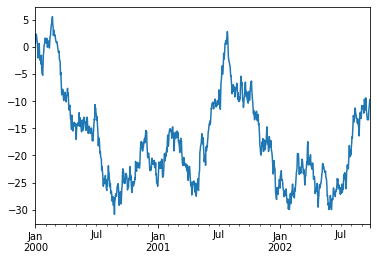

In [108]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

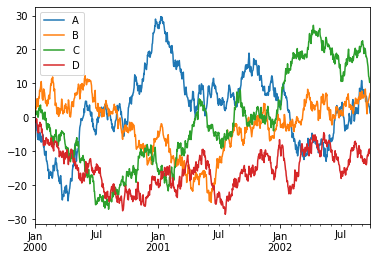

In [113]:
'''在一个DataFrame中, plot() 方法可以方便地绘制带有label的所有列'''
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()

plt.legend(loc='best')

# 13 数据输入/输出

In [114]:
df.to_csv('foo.csv')

In [115]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.429832,1.236692,0.996735,-1.062888
1,2000-01-02,-0.705575,1.776396,0.901432,-1.157311
2,2000-01-03,-1.107683,3.013493,0.756390,-1.441457
3,2000-01-04,-1.229054,2.765219,1.873758,-1.336715
4,2000-01-05,-2.916932,4.127895,1.700359,-0.394530
...,...,...,...,...,...
995,2002-09-22,4.002349,5.173632,12.057497,-9.819989
996,2002-09-23,3.221108,5.672504,11.879771,-10.670823
997,2002-09-24,3.191382,6.264379,10.936018,-9.277329
998,2002-09-25,2.591759,6.829247,10.293062,-10.519413


In [117]:
 '''
  df.to_hdf('foo.h5', 'df')
  pd.read_hdf('foo.h5', 'df')
 '''

"\n df.to_hdf('foo.h5', 'df')\n pd.read_hdf('foo.h5', 'df')\n"

In [119]:
'''df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
'''

"df.to_excel('foo.xlsx', sheet_name='Sheet1')\npd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])\n"